In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('height-weight.csv')

In [3]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 500.0 bytes


Text(0, 0.5, 'Height')

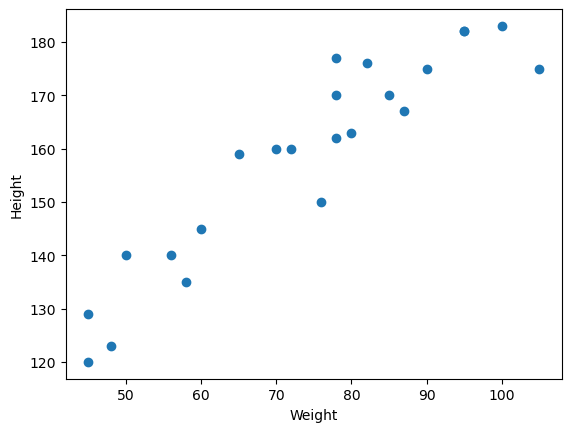

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [9]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [10]:
X=df[['Weight']]
y=df['Height']

In [12]:
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [13]:
X.shape

(23, 1)

In [14]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [16]:
y.shape

(23,)

In [17]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [25]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [26]:
y_train.shape,y_test.shape

((18,), (5,))

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [30]:
X_train=scaler.fit_transform(X_train)

In [31]:
X_test=scaler.transform(X_test)

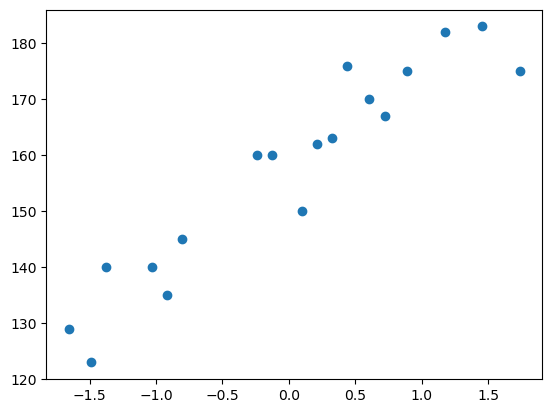

In [33]:
plt.scatter(X_train,y_train)

In [34]:
from sklearn.linear_model import LinearRegression

In [36]:
regressor=LinearRegression()

In [ ]:
## Training the train data

In [37]:
regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
regressor.intercept_

157.5

In [39]:
regressor.coef_

array([17.03440872])

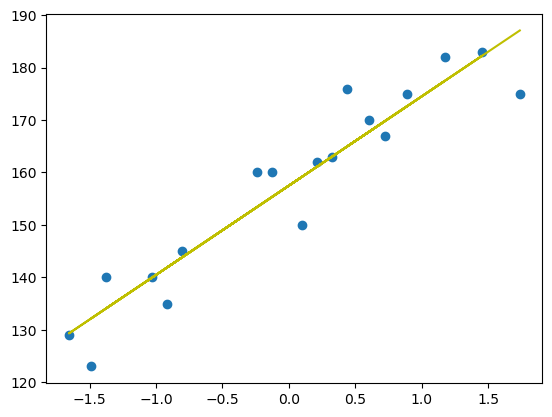

In [45]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'y')

### Prediction of Train data
1. predicted height output=intercept + coef_(Weights)
2. y_pred_train=157.5 + 17.03(X_train)

### Prediction of Test data
1. predicted height output=intercept + coed_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [46]:
y_pred_test=regressor.predict(X_test)

In [47]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [48]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

### Perfromance Metrics

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [53]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051654
9.822657814519227
10.477400726827076


### Accuracy of the Model

### R square
##### Formula
#### R^2 = 1 - SSR/SSt
- R^2 = Accuracy of the model
- SSR = Sum of squares of residuals
- SST = Total sum of squares

In [55]:
from sklearn.metrics import r2_score

In [56]:
score = r2_score(y_test,y_pred_test)

In [62]:
score

0.7769869860423441

### Adjusted R square
##### Formula
#### Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]
- R2 = R2 of the model
- n = Number of observations
- k = The number of predictor values

In [61]:
1 - ( 1-score) * ( len(y_test) - 1 ) / ( len(y_test) - X_test.shape[1] - 1 )

0.7026493147231254

In [63]:
scaler

StandardScaler()

In [64]:
regressor

LinearRegression()